# Chicago Crash Data

In [ ]:
# anna poon's analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
crash = pd.read_csv("traffic_crashes.csv")

In [7]:
crash.head(4)

,CRASH_RECORD_ID,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,016eaf0b25d64bf0917f77ad2c7468196178eaea750a5f...,JE287447,NaN,07/02/2021 03:40:00 PM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,15,6,7,NaN,NaN,NaN
1,06ab00f94c073b8bd07ccf085935a800077ad9cee09490...,JE192048,NaN,04/07/2021 09:00:00 AM,20,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,...,0.0,0.0,1.0,0.0,9,4,4,41.743068,-87.693816,POINT (-87.693815614874 41.743067832139)
2,176fbd45c70226ad9a63ff015d87090dd51b2674d0f23e...,JD181795,NaN,03/11/2020 10:00:00 AM,10,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,REAR TO REAR,...,0.0,0.0,2.0,0.0,10,4,3,41.684308,-87.680775,POINT (-87.680774721691 41.68430795958)
3,242250246f9ea909eb5805f45125840489a1ea37fab7dd...,JC128630,NaN,01/24/2019 07:40:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,...,0.0,0.0,2.0,0.0,19,5,1,41.886422,-87.644413,POINT (-87.64441278977 41.886421852271)


In [8]:
crash.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,565687.000000,1.903210e+05,565687.000000,565682.000000,565687.000000,564517.000000,564517.000000,564517.000000,564517.000000,564517.000000,564517.000000,564517.0,565687.000000,565687.000000,565687.000000,562352.000000,562352.000000
mean,28.342368,1.382022e+01,3675.132524,1238.706687,2.035155,0.184064,0.001151,0.020030,0.103481,0.059401,2.015652,0.0,13.231306,4.125094,6.792265,41.854660,-87.673299
std,6.286897,3.028444e+03,2906.837601,705.983650,0.451937,0.556900,0.036770,0.165469,0.415107,0.312451,1.167690,0.0,5.538002,1.979108,3.402583,0.331965,0.674209
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.935877
25%,30.000000,2.000000e+00,1227.000000,712.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.781140,-87.721396
50%,30.000000,2.000000e+00,3200.000000,1135.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874790,-87.673621
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924051,-87.632968
max,70.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,7.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [9]:
crash.fillna(value=0, inplace=True)


In [10]:
crash.shape[0]

565687

In [11]:
crash.columns

# use posted speed limit, weather condition, lighting condition, road defect, crash hour, roadway surface conditions
# predict injuries vs no injuries



Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LA

In [28]:
crash.CRASH_TYPE.value_counts()

NO INJURY / DRIVE AWAY              418500
INJURY AND / OR TOW DUE TO CRASH    147187
Name: CRASH_TYPE, dtype: int64

In [12]:
crash.CRASH_DAY_OF_WEEK.value_counts()

6    92128
7    83877
5    80950
3    80659
4    80154
2    78343
1    69576
Name: CRASH_DAY_OF_WEEK, dtype: int64

In [13]:
crash.CRASH_HOUR.value_counts()

16    43298
15    43077
17    42332
14    38153
18    35165
13    34894
12    33528
8     29343
11    29067
9     26111
10    25910
19    25858
7     23663
20    20666
21    18466
22    17045
23    14492
6     12462
0     11948
1     10211
2      8700
5      7747
3      7116
4      6435
Name: CRASH_HOUR, dtype: int64

In [14]:
crash.WEATHER_CONDITION.value_counts()

CLEAR                       449627
RAIN                         49376
UNKNOWN                      25291
SNOW                         20252
CLOUDY/OVERCAST              16824
OTHER                         1719
FOG/SMOKE/HAZE                 867
FREEZING RAIN/DRIZZLE          724
SLEET/HAIL                     720
BLOWING SNOW                   169
SEVERE CROSS WIND GATE         116
BLOWING SAND, SOIL, DIRT         2
Name: WEATHER_CONDITION, dtype: int64

In [27]:
crash["INJURIES_TOTAL"].value_counts()

0.0     489964
1.0      57265
2.0      12473
3.0       3787
4.0       1368
5.0        490
6.0        197
7.0         73
8.0         26
9.0         16
10.0         9
15.0         5
11.0         5
21.0         3
12.0         2
13.0         2
19.0         1
16.0         1
Name: INJURIES_TOTAL, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe5109be6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe5109bedc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe5109be2e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fe5109ce520>],
 'fliers': [],
 'means': []}

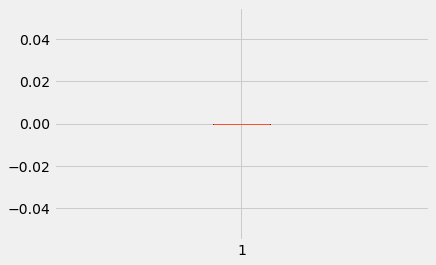

In [26]:
plt.boxplot(crash['INJURIES_TOTAL'], showfliers = False)

In [17]:
crash.INJURIES_TOTAL.value_counts()

0.0     489964
1.0      57265
2.0      12473
3.0       3787
4.0       1368
5.0        490
6.0        197
7.0         73
8.0         26
9.0         16
10.0         9
15.0         5
11.0         5
21.0         3
12.0         2
13.0         2
19.0         1
16.0         1
Name: INJURIES_TOTAL, dtype: int64

# Does rain lead to more injuries in crashes caused by weather?

In [15]:
not_winter.CRASH_TYPE.value_counts()/sum(not_winter.CRASH_TYPE.value_counts())

NameError: name 'not_winter' is not defined

In [ ]:
winter.CRASH_TYPE.value_counts()/sum(winter.CRASH_TYPE.value_counts())

In [ ]:
crashes.iloc[np.where(crashes.WEATHER_CONDITION == "CLEAR")]

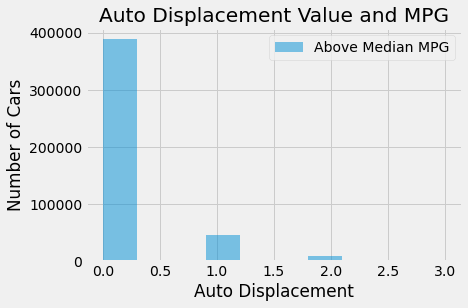

In [16]:

crashes = crash.iloc[np.where(crash.INJURIES_TOTAL <= 3)]

plt.hist(crashes.iloc[np.where(crashes.WEATHER_CONDITION == "CLEAR")].INJURIES_TOTAL, alpha=0.5, label="Above Median MPG")
plt.title("Auto Displacement Value and MPG")
plt.xlabel("Auto Displacement")
plt.ylabel("Number of Cars")
plt.legend()

print()

# visible separation between groups; displacement value is probably a good indicator


In [ ]:
crashes = crash.iloc[np.where(crash.INJURIES_TOTAL <= 3)]
#plt.bar(crashes.iloc[np.where(crashes.WEATHER_CONDITION == "CLEAR")].INJURIES_TOTAL.value_counts(normalize=True).index[:] - 0.2, crashes.iloc[np.where(crashes.WEATHER_CONDITION == "CLEAR")].INJURIES_TOTAL.value_counts(normalize=True).values[:], alpha=0.3, label="Clear")
#plt.bar(crashes.iloc[np.where(crashes.WEATHER_CONDITION != "CLEAR")].INJURIES_TOTAL.value_counts(normalize=True).index[:] + 0.2, crashes.iloc[np.where(crashes.WEATHER_CONDITION != "CLEAR")].INJURIES_TOTAL.value_counts(normalize=True).values[:], alpha=0.3, label="Inclement Weather")

plt.bar(crashes.iloc[np.where(crashes.WEATHER_CONDITION == "CLEAR")].INJURIES_TOTAL.value_counts(normalize=True).index[:] - 0.2, crashes.iloc[np.where(crashes.WEATHER_CONDITION == "CLEAR")].INJURIES_TOTAL.value_counts(normalize=True).values[:], 0.4, alpha=1, label="Clear", color="#1E88E5")
plt.bar(crashes.iloc[np.where(crashes.WEATHER_CONDITION != "CLEAR")].INJURIES_TOTAL.value_counts(normalize=True).index[:] + 0.2, crashes.iloc[np.where(crashes.WEATHER_CONDITION != "CLEAR")].INJURIES_TOTAL.value_counts(normalize=True).values[:], 0.4, alpha=1, label="Inclement Weather", color="#D81B60")

plt.title("Weather vs. Clear: Injury Count")
plt.xlabel("Number of Injuries")
plt.ylabel("Percent of Total Injuries")
plt.legend()

plt.savefig("weather_injury.png", dpi=300, bbox_inches="tight")

print()

# visible separation between groups; displacement value is probably a good indicator

In [ ]:
winter = crash.iloc[np.where(np.logical_or(crash.CRASH_MONTH == 1, crash.CRASH_MONTH == 12))]
not_winter = crash.iloc[np.where(np.logical_and(crash.CRASH_MONTH != 1, crash.CRASH_MONTH != 12))]
rain = crash.iloc[np.where(crash.WEATHER_CONDITION == "RAIN")]
clear = crash.iloc[np.where(crash.WEATHER_CONDITION == "CLEAR")]

In [ ]:
rain.DAMAGE.value_counts(normalize=True)

In [ ]:
clear.DAMAGE.value_counts(normalize=True)

In [ ]:
#plt.hist(rain.DAMAGE.value_counts(), alpha=0.5)
plt.bar(rain.DAMAGE.value_counts(normalize=True).index[:], rain.DAMAGE.value_counts(normalize=True).values[:], alpha=0.3)
plt.bar(clear.DAMAGE.value_counts(normalize=True).index[:], clear.DAMAGE.value_counts(normalize=True).values[:], alpha=0.3)

#plt.hist(clear.DAMAGE.value_counts(), alpha=0.5)

In [ ]:
winter.DAMAGE.value_counts()/sum(winter.DAMAGE.value_counts())

In [ ]:
not_winter.DAMAGE.value_counts()/sum(not_winter.DAMAGE.value_counts())

In [ ]:
crash.INJURIES_TOTAL.value_counts()/sum(crash.INJURIES_TOTAL.value_counts())

In [ ]:
crash.CRASH_HOUR.value_counts()/sum(crash.CRASH_HOUR.value_counts())

In [ ]:
winter.CRASH_HOUR.value_counts()/sum(winter.CRASH_HOUR.value_counts())

In [ ]:
#weather = crash.iloc[np.where(crash.PRIM_CONTRIBUTORY_CAUSE == "WEATHER")]
weather = crash.iloc[np.where(crash.WEATHER_CONDITION != "CLEAR")]
weather.WEATHER_CONDITION.value_counts()

In [ ]:
crash.INJURIES_TOTAL.value_counts()/sum(crash.INJURIES_TOTAL.value_counts())

In [ ]:
weather.INJURIES_TOTAL.value_counts()/sum(weather.INJURIES_TOTAL.value_counts())

In [ ]:
cw = crash.iloc[np.where(crash.PRIM_CONTRIBUTORY_CAUSE == "WEATHER")]

In [ ]:
crash.CRASH_MONTH.value_counts()

In [ ]:
cw.WEATHER_CONDITION.value_counts(normalize=False)

In [ ]:
cw.ROADWAY_SURFACE_COND.value_counts(normalize=False)

In [ ]:
sum(cw.ROADWAY_SURFACE_COND.value_counts(normalize=False))

In [ ]:
crash.INJURIES_TOTAL.value_counts()

In [ ]:
8984-(3970+3453+1268)

In [ ]:
plt.figure(figsize=(6,6)) 
plt.rcParams.update({'font.size': 16})
plt.title("Road Condition of Crashes Caused by Weather 2016-2021")

labels = 'Wet', 'Snow/Slush', 'Ice', 'Other'
sizes = [3970/8984, 3453/8984, 1268/8984, 777/8984]
#explode = (0, 0, 0, 0.05, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = ['#C3E7AD','#D7ADE7','#B5D0F0', '#F3B19A', '#F3E89A']

plt.pie(sizes, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=False, startangle=60)

plt.savefig("weather_causes", dpi=300, bbox_inches="tight")

plt.show()
print()

In [ ]:
#weather = crash.iloc[np.where(crash.PRIM_CONTRIBUTORY_CAUSE == "WEATHER")]
weather = crash.iloc[np.where(np.logical_or(weather.WEATHER_CONDITION == "CLEAR", weather.WEATHER_CONDITION =="RAIN"))]
#weather = weather.iloc[np.where(weather.INJURIES_TOTAL >= 1)]
weather = weather.reset_index()



In [ ]:
weather.WEATHER_CONDITION.value_counts()

In [ ]:
crash.INJURIES_INCAPACITATING.value_counts()

In [ ]:
weather.INJURIES_INCAPACITATING.value_counts()

In [ ]:
def regression(x, y):
    xcol = x
    ycol = y
    
    meanx = np.mean(xcol)
    meany = np.mean(ycol)
    
    stdx = np.std(xcol)
    stdy = np.std(ycol)
    
    numer = 0
    denom = 0
    
    for i in range(len(x)):
        numer += (xcol[i] - meanx) * (ycol[i] - meany)
        denom += (xcol[i] - meanx) ** 2

    slope = numer / denom
    intercept = meany - (slope * meanx)
    
    return "Slope:", slope, "Intercept:", intercept

def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

def correlation(x, y):
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

In [ ]:
condition = np.array([])
for i in range(len(weather)):
    if weather.WEATHER_CONDITION[i] == "CLEAR":
        condition = np.append(condition, 0)
    elif weather.WEATHER_CONDITION[i] == "RAIN":
        condition = np.append(condition, 1)

In [ ]:
weather.WEATHER_CONDITION
np.count_nonzero(condition == 1)

In [ ]:
injury = np.array([])

for i in range(len(weather)):
    if weather.INJURIES_TOTAL[i] == 1:
        injury = np.append(injury, 0)
    else:
        injury = np.append(injury, 1)

In [ ]:
len(injury), len(condition)

In [ ]:
regression((condition), (weather.INJURIES_TOTAL))

In [ ]:
plt.scatter(condition, weather.INJURIES_TOTAL)
plt.title("Weather Condition vs. Total Injuries \n Regression 2016-2021")
plt.xlabel("Clear vs. Rain")
plt.ylabel("# Injuries")

x = np.linspace(np.min(condition), np.max(condition),60)
y = 0.03895057220501825*x + 0.20695106713925018
plt.plot(x, y, '-r')

plt.savefig("rain_regression", dpi=300, bbox_inches="tight")

print()

In [ ]:
weather_snow = crash.iloc[np.where(np.logical_or(crash.WEATHER_CONDITION == "CLEAR", crash.WEATHER_CONDITION =="SNOW"))]
snow_condition = np.array([])
for i in range(len(weather_snow)):
    if weather_snow.WEATHER_CONDITION[i] == "CLEAR":
        snow_condition = np.append(snow_condition, 0)
    elif weather_snow.WEATHER_CONDITION[i] == "SNOW":
        snow_condition = np.append(snow_condition, 1)


In [ ]:
plt.scatter(condition, weather.INJURIES_TOTAL)
plt.title("Weather Condition vs. Total Injuries \n Regression 2016-2021")
plt.xlabel("Clear vs. Rain")
plt.ylabel("# Injuries")

x = np.linspace(np.min(condition), np.max(condition),60)
y = 0.03895057220501825*x + 0.20695106713925018
plt.plot(x, y, '-r')

plt.savefig("rain_regression", dpi=300, bbox_inches="tight")

print()

In [ ]:
weather.INJURIES_TOTAL.value_counts()

In [ ]:
crash.CRASH_TYPE.value_counts()

In [ ]:
types = np.array([])

CRASH_TYPE
for i in range(len(weather)):
    if weather.CRASH_TYPE[i] == "NO INJURY / DRIVE AWAY":
        cost = np.append(cost, 0)
    elif weather.CRASH_TYPE[i] == "$501 - $1,500"

In [ ]:
cost = np.array([])

for i in range(len(weather)):
    if weather.DAMAGE[i] == "$500 OR LESS":
        cost = np.append(cost, 0)
    elif weather.DAMAGE[i] == "$501 - $1,500":
        cost = np.append(cost, 1)
    elif weather.DAMAGE[i] == "OVER $1,500":
        cost = np.append(cost, 2)

In [ ]:
len(cost) == len(condition)

In [ ]:
regression(condition, injury)

In [ ]:
correlation(condition, injury)

In [ ]:
predict = pd.DataFrame({})
# use posted speed limit, weather condition, lighting condition, road defect, crash hour, roadway surface conditions


In [ ]:
crash.ROAD_DEFECT.value_counts()

defects = np.array([])

for i in range(len(crash)):
    if crash.ROAD_DEFECT[i] == "NO DEFECTS":
        defects = np.append(defects, 0)
    else:
        defects = np.append(defects, 1)

In [ ]:
crash.WEATHER_CONDITION.value_counts()

In [ ]:
weather = np.array([])

for i in range(len(crash)):
    if crash.WEATHER_CONDITION[i] == "RAIN":
        weather = np.append(weather, 1)
    elif crash.WEATHER_CONDITION[i] == "SNOW":
        weather = np.append(weather, 2)
    elif crash.WEATHER_CONDITION[i] == "CLOUDY/OVERCAST":
        weather = np.append(weather, 3)
    elif crash.WEATHER_CONDITION[i] == "FREEZING RAIN/DRIZZLE":
        weather = np.append(weather, 4)
    elif crash.WEATHER_CONDITION[i] == "FOG/SMOKE/HAZE":
        weather = np.append(weather, 5)
    elif crash.WEATHER_CONDITION[i] == "SLEET/HAIL":
        weather = np.append(weather, 6)
    elif crash.WEATHER_CONDITION[i] == "BLOWING SNOW":
        weather = np.append(weather, 7)
    elif crash.WEATHER_CONDITION[i] == "SEVERE CROSS WIND GATE":
        weather = np.append(weather, 8)
    elif crash.WEATHER_CONDITION[i] == "BLOWING SAND, SOIL, DIRT":
        weather = np.append(weather, 9)   

In [ ]:
crash.LIGHTING_CONDITION.value_counts()

lighting = np.array([])

for i in range(len(crash)):
    if crash.LIGHTING_CONDITION[i] == "DAYLIGHT":
        lighting = np.append(lighting, 0)
    else:
        lighting = np.append(lighting, 1)

In [ ]:
crash.ROADWAY_SURFACE_COND.value_counts()

conditions = np.array([])

for i in range(len(crash)):
    if crash.ROADWAY_SURFACE_COND[i] == "DRY":
        conditions = np.append(conditions, 0)
    else:
        conditions = np.append(conditions, 1)

In [ ]:
crash.INJURIES_TOTAL.value_counts()

injuries = np.array([])

for i in range(len(crash)):
    if crash.INJURIES_TOTAL[i] >= 1:
        injuries = np.append(injuries, 0)
    else:
        injuries = np.append(injuries, 1)

In [ ]:
def su(column):
    "Convert a dataframe column to standard units."
    x = predict[column].tolist()
    return (x - np.average(x))/np.std(x,ddof=1)

In [ ]:
predict = predict.iloc[:500]

In [ ]:
predict["defects"] = defects
predict["conditions"] = conditions
predict["lighting"] = lighting
predict["weather"] = weather
predict["speed_limit"] = crash.POSTED_SPEED_LIMIT
predict["hour"] = crash.iloc[:500].CRASH_HOUR
predict["injuries"] = injuries

In [ ]:
predict.defects = su("defects")
predict.conditions = su("conditions")
predict.lighting = su("lighting")
predict.weather = su("weather")
predict.speed_limit = su("speed_limit")
predict.hour = su("hour")
predict.injuries = su("injuries")

In [ ]:
predict

In [ ]:
def standard_units(x):
    "Convert any array of numbers to standard units."
    return (x - np.average(x))/np.std(x,ddof=1)  

def correlation(x, y):
    x_in_standard_units = standard_units(x)
    y_in_standard_units = standard_units(y)
    if len(x)!=len(y):
        raise ValueError('arrays are of different lengths')
    return sum(x_in_standard_units * y_in_standard_units)/(len(x)-1)

In [ ]:
correlation(predict.defects, predict.injuries), \
correlation(predict.conditions, predict.injuries), \
correlation(predict.lighting, predict.injuries), \
correlation(predict.weather, predict.injuries), \
correlation(predict.speed_limit, predict.injuries), \
correlation(predict.hour, predict.injuries)

In [ ]:
len(predict)

In [ ]:
sim = predict.sample(frac=1)

x_train=sim.iloc[1000:4000].drop(columns=['injuries'])
x_test=sim.iloc[0:1000].drop(columns=['injuries'])
y_train=sim.iloc[1000:4000].injuries
y_test=sim.iloc[0:1000].injuries

x_train.head(2)

In [ ]:
def distance(pt1, pt2):
    return np.sqrt(sum((pt1 - pt2)**2))

def all_distances(X_train, point):
    attributes = X_train.copy()
    def distance_from_point(row):
        return distance(point, np.array(row))
    return attributes.apply(distance_from_point,axis=1)

def closest(X_train, Y_train, point, k):
    attributes=X_train.copy()
    attributes['Distance']=all_distances(attributes, point)
    attributes['Class']=Y_train
    attributes=attributes.sort_values('Distance')    
    topk = attributes.head(k)
    return topk

def majority(topkclasses):
    ones = topkclasses[topkclasses.Class==1].shape[0]
    zeros = topkclasses[topkclasses.Class==0].shape[0]
    if ones > zeros:
        return 1
    else:
        return 0

def classify(X_train,Y_train, X_test, k):
    n=X_test.shape[0]
    
    pred_class = np.array([])
    for i in np.arange(n):
        topkclasses = closest(X_train,Y_train, X_test.iloc[i], k)
        pred_class = np.append(pred_class,majority(topkclasses))
    
    report_df=X_test.copy()
    report_df['Class']=pred_class
    
    return report_df

In [ ]:
class_df=classify(x_train,y_train, x_test, 5)
class_df.head(2)

In [ ]:
1 - 527616/len(crash)
# 13.5% of the crashes involved at least one injury

In [ ]:
crash.dt_col = pd.to_datetime(crash.CRASH_DATE)

In [ ]:
crash.groupby(pd.to_datetime(crash.CRASH_DATE).year).CRASH_DAY_OF_WEEK.size()

In [ ]:
plt.barh(crash.CRASH_DAY_OF_WEEK.value_counts().index[:], crash.CRASH_DAY_OF_WEEK.value_counts().values[:], color="#6bb0ff")

plt.yticks(ticks=[1,2,3,4,5,6,7], labels=["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.ylabel("Day of Week", labelpad=10)
plt.xlabel("Number of Crashes", labelpad=10)
plt.title("Total Number of Crashes 2016-2021 vs Day of Week", pad=15)

plt.savefig('day_of_week_dist.png', dpi=300, bbox_inches="tight")

# I want the average number of crashes per day of week 
# groupby day, then average the number of occurences by the number of unique Sundays, etc.

print()


In [ ]:
crash.iloc[np.where(crash.WEATHER_CONDITION == "RAIN")].INJURIES_TOTAL.value_counts(normalize=True)

In [ ]:
sum(crash.CRASH_DAY_OF_WEEK.value_counts())

In [ ]:
crash.iloc[np.where(crash.WEATHER_CONDITION == "CLEAR")].INJURIES_TOTAL.value_counts(normalize=True)

In [ ]:
rain = np.array([])

for i in range(len(crash)):
    if crash.WEATHER_CONDITION[i] == "CLEAR":
        rain = np.append(rain, 0)
    elif crash.WEATHER_CONDITION[i] == "RAIN":
        rain = np.append(rain, 1)

In [ ]:
weather = crash.iloc[np.where(np.logical_or(crash.WEATHER_CONDITION == "CLEAR", crash.WEATHER_CONDITION =="RAIN"))]


In [ ]:
weather = crash.iloc[np.where(np.logical_or(crash.WEATHER_CONDITION == "CLEAR", crash.WEATHER_CONDITION =="RAIN"))]


In [ ]:
injuries = np.array([])

for i in range(len(weather)):
    if weather.INJURIES_TOTAL[i] >= 1:
        injuries = np.append(injuries, 1)
    else:
        injuries = np.append(injuries, 0)

In [ ]:
len(injure)

In [ ]:
correlation(rain, injure)

# Most frequent: hour, month, day of the week, street, type of crash, weather + road condition

In [ ]:
# average crashes per year

year = pd.DatetimeIndex(crash['CRASH_DATE']).year
date = pd.to_datetime(crash['CRASH_DATE']).dt.date
crash["date"] = date
day = crash.CRASH_DAY_OF_WEEK
month = crash.CRASH_MONTH


In [ ]:
year.value_counts()

In [ ]:
plt.barh((crash.CRASH_DAY_OF_WEEK.value_counts()/per_day.CRASH_DAY_OF_WEEK.value_counts()).index[:], crash.CRASH_DAY_OF_WEEK.value_counts()/per_day.CRASH_DAY_OF_WEEK.value_counts().values[:], color="#ff907d")

plt.yticks(ticks=[1,2,3,4,5,6,7], labels=["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.ylabel("Day of Week", labelpad=10)
plt.xlabel("Average Number of Crashes per Day", labelpad=10)
plt.title("Average Number of Crashes 2016-2021 per Week Day", pad=15)

plt.savefig('ave_day_of_week_dist.png', dpi=300, bbox_inches="tight")

# I want the average number of crashes per day of week 
# groupby day, then average the number of occurences by the number of unique Sundays, etc.

print()


In [ ]:
plt.barh(crash.CRASH_DAY_OF_WEEK.value_counts().index[:], crash.CRASH_DAY_OF_WEEK.value_counts().values[:], color="#6bb0ff")

plt.yticks(ticks=[1,2,3,4,5,6,7], labels=["Sunday","Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"])
plt.ylabel("Day of Week", labelpad=10)
plt.xlabel("Total Number of Crashes per Week Day Label", labelpad=10)
plt.title("Total Number of Crashes 2016-2021 vs Day of Week", pad=15)

plt.savefig('day_of_week_dist.png', dpi=300, bbox_inches="tight")

# I want the average number of crashes per day of week 
# groupby day, then average the number of occurences by the number of unique Sundays, etc.

print()


In [ ]:
per_day = crash.drop_duplicates(subset="date")

In [ ]:
sum(year.value_counts())/len(np.unique(year))

In [ ]:
day.value_counts()

In [ ]:
year.value_counts().mean()

In [ ]:
sum(year.value_counts())/len(np.unique(date))

In [ ]:
date

In [ ]:
date = date.sort_values()
date

In [ ]:
dated = pd.DataFrame({
    "date": date.sort_values(ascending=True),
    "count": 
})

In [ ]:
plt.plot(date, lake_levels)   
plt.xlabel('Year')   
plt.ylabel('Level (in meters)')
plt.title("Timeseries of Monthly Lake Levels of Lake Michigan")

print()

In [ ]:
date.value_counts(sort=False)

In [ ]:
date.

In [ ]:
#plt.plot(date.value_counts().index[:], date.value_counts().values[:], color="#6bb0ff")
plt.plot(per_day.date, per.value_counts())

plt.ylabel("Number on Date")
plt.xlabel("Date")
plt.title("Number of Crashes vs Day of Week")

# I want the average number of crashes per day of week 
# groupby day, then average the number of occurences by the number of unique Sundays, etc.

print()

In [ ]:
date.value_counts().mean()

In [ ]:
sum(date.value_counts())/len(np.unique(date))

In [ ]:
month.value_counts()

In [ ]:
crash.LOCATION.value_counts()